In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [31]:
from skimage.util import montage
montage_rgb = lambda x: np.stack([montage(x[:, :, :, i]) for i in range(x.shape[3])], -1)

### Load the training images & masks

In [5]:
images = np.load('data_legs5k128/images-128.npy')
masks = np.load('data_legs5k128/masks-128.npy')

In [8]:
images.shape, masks.shape

((5000, 128, 128, 3), (5000, 128, 128, 3))

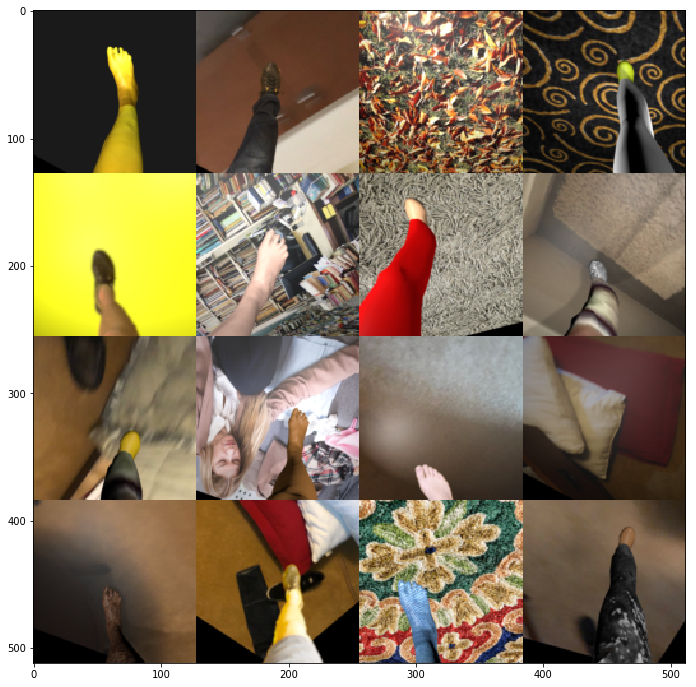

In [29]:
figsize(12,12)
imshow(montage_rgb(images[0:16,:,:,:]))

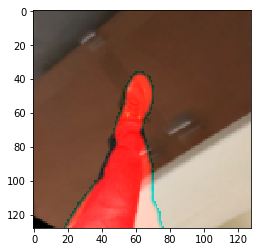

In [78]:
def blend(image, mask):
    idx = (mask>0)
    blended = image.copy()
    blended[idx] = mask[idx]
    return blended


figsize(4,4)
imshow(blend(images[1], masks[1]))

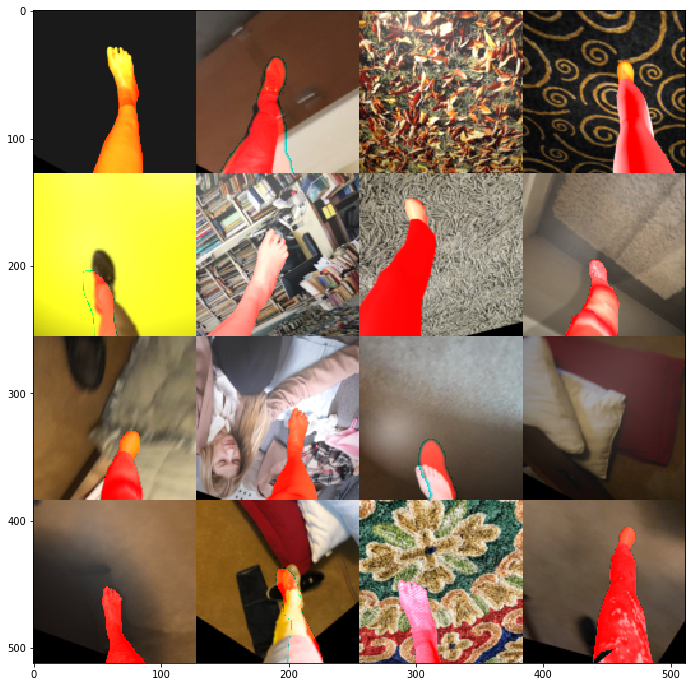

In [79]:
i = 16
blended = stack([blend(image, mask) for image, mask in zip(images[0:i,:,:,:], masks[0:i,:,:,:])])

figsize(12,12)
imshow(montage_rgb(blended[0:16,:,:,:]))